
# Gráficos de entropía

Metamos los gráficos que necesitamos en esta notebook

In [1]:

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import contrastes
import seaborn as sns


In [2]:
from contrastes.lists import add_info
from scipy.stats import entropy

df = contrastes.read_occurrence_dataframe("output/provinces_words.csv", filter_words=True)

add_info(df)

df["entropia_usuarios"] = df[df.cant_personas].apply(entropy, axis=1, raw=True)
df["entropia_palabras"] = df[df.cant_palabras].apply(entropy, axis=1, raw=True)

/home/jmperez/projects/contrastes/notebooks/contrastes/processing.py:147: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cant_palabras = cant_palabras
/home/jmperez/projects/contrastes/notebooks/contrastes/processing.py:148: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.cant_personas = cant_personas


Calculating information values...
Calculating ranks...
Adding fnorms...


In [3]:
num_words = 20
top_palabras = df.sort_values("rank_palabras").index
top_personas = df.sort_values("rank_personas").index
top_palper = df.sort_values("rank_palper").index

rank = list(range(1, len(top_palper)+1))
table = pd.DataFrame({
    "palabras": top_palabras, 
    "personas": top_personas, 
    "mixed": top_palper}, index=rank)

table[["palabras", "personas", "mixed"]][:20]
#print(table[["palabras", "personas", "mixed"]][:20].to_latex())

,palabras,personas,mixed
1,ushuaia,chivil,chivilcoy
2,rioja,ush,ush
3,chivilcoy,poec,tolhuin
4,bragado,malpegue,blv
5,viedma,aijue,chivil
6,logroño,tolhuin,logroño
7,chepes,vallerga,bragado
8,oberá,yarca,vallerga
9,cldo,blv,breñas
10,tdf,portho,malpegue


Como podemos observar en la tabla, la mayoría de las palabras son topónimos (Ushuaia-ush, fsa (Formosa),Chivilcoy, tdf, boliches bailables como kraka y wika ) gentilicios (riojanos, fueguinos) o refieren a realidades provinciales (POEC, `Período de Orientación y Evaluación Complementaria`). Algunas palabras, sin embargo, guardan relevancia lexicográfica: 

- `aijue`
- `sinf`
- `cldo`
- `yarca`/`yarco`
- `bombola`
- `malpegue`


A su vez, la aparición de ciertas palabras como Logroño (ciudad de La Rioja, España) indica que muchos usuarios de dicha ciudad de España han indicado incorrectamente que están en La Rioja, pero de Argentina.

Veamos más palabras

In [4]:
table[["palabras", "personas", "mixed"]][100:121]

,palabras,personas,mixed
101,malal,ndeee,cldos
102,ibarreta,refsa,jei
103,coplera,fueguino,argel
104,nae,veril,fne
105,cdelu,noxxx,trapani
106,gyt,emsa,riojana
107,agraden,malpegada,melella
108,chosma,bevono,yarcos
109,olta,olta,bnz
110,fsa,chenque,lerma


### Topónimos 
- chos, malal, chosma, jumeal, calahorra (La Rioja), palpalá, tdf, Olta, ibarreta, fsa, Apóstoles, caucete, Capioví, Veril
- unsa (Universidad)
- Night Clubs: akil, noxxx, Bevono, DLO
- Sport Clubs: OTC
- Companies: REFSA, EMSA, Trapani (Restaurant), EDESE
- Chenque: Monte o club

### Políticos o sujetos locales
- Quintela
- Corpacci
- Fellner
- Abelardos (banda de Rock)
- FNE: Feria Nacional de Estudiantes (Jujuy)


### Guaranismos:
- ndee
- Argel?
- Yaguá

### Otras acepciones:
- jei
- atinar
- aprontar


## Entropía distribucional por palabras y usuarios

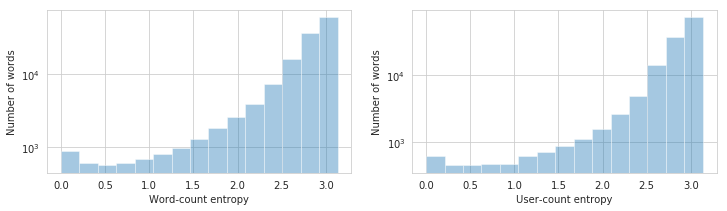

In [5]:
plt.rcParams["figure.figsize"] = (12,3)

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2)

def plot_word_count_entropy(ax=None):
    g = sns.distplot(df["entropia_palabras"], bins=15, kde=False, ax=ax)
    g.semilogy()
    g.set_xlabel("Word-count entropy")
    g.set_ylabel("Number of words")
    g.grid(True)

def plot_user_count_entropy(ax=None):
    g = sns.distplot(df["entropia_usuarios"], bins=15, kde=False, ax=ax)
    g.set_xlabel("User-count entropy")
    g.set_ylabel("Number of words")
    g.semilogy()
    g.grid(True)

plot_word_count_entropy(ax=axes[0])
plot_user_count_entropy(ax=axes[1])

In [6]:
%%capture
plt.rcParams["figure.figsize"] = (6,3)

plot_word_count_entropy()
plt.savefig("../output/figures/word_count_entropy.png", bbox_inches='tight')



In [7]:
%%capture
plt.rcParams["figure.figsize"] = (6,3)

plot_user_count_entropy()
plt.savefig("../output/figures/user_count_entropy.png", bbox_inches='tight')

# Gráficos de Entropía + Posición 

Los colores de los gráficos los vamos a calcular sobre los logaritmos del ranking, ya que no nos interesa demasiado la diferencia entre números grandes de ranking (20 mil y 25 mil son casi lo mismo) pero sí entre valores chiquitos...

In [8]:


df["norm_palabra"] = np.log(df.cant_palabra)
df["norm_palabra"] /= df["norm_palabra"].max()

df["norm_personas"] = np.log(df.cant_usuarios)
df["norm_personas"] /= df["norm_personas"].max()

df["log_rank_personas"] = np.log(df.rank_personas)
df["log_rank_palabras"] = np.log(df.rank_palabras)
df["log_rank_palper"] = np.log(df.rank_palper)

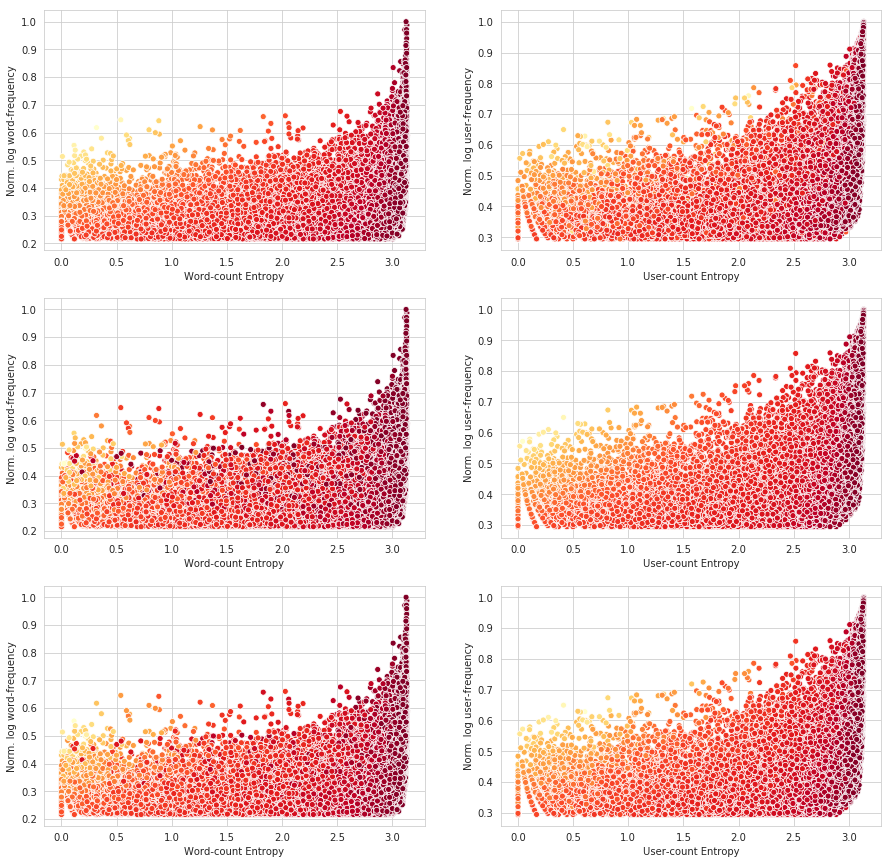

In [9]:
plt.rcParams["figure.figsize"] = (15,15)

sample_df = df.sample(frac=1)

fig, axes = plt.subplots(3, 2)

labels = {
    "entropia_palabras": "Word-count Entropy",
    "norm_palabra": "Norm. log word-frequency",
    "entropia_usuarios": "User-count Entropy",
    "norm_personas": "Norm. log user-frequency",
}

def my_scatter(data, x, y, hue,**kwargs):
    g = sns.scatterplot(
        x=x, y=y, data=data, hue=hue, 
        palette="YlOrRd", legend=False, **kwargs)
    #plt.scatter(data[x], data[y], c=-data[hue])
    g.set_xlabel(labels[x])
    g.set_ylabel(labels[y])
    

my_scatter(sample_df, x="entropia_palabras", y="norm_palabra", hue="log_rank_palabras", ax=axes[0][0])
my_scatter(sample_df, x="entropia_usuarios", y="norm_personas", hue="log_rank_palabras", ax=axes[0][1])

my_scatter(sample_df, x="entropia_palabras", y="norm_palabra", hue="log_rank_personas", ax=axes[1][0])
my_scatter(sample_df, x="entropia_usuarios", y="norm_personas", hue="log_rank_personas", ax=axes[1][1])


my_scatter(sample_df, x="entropia_palabras", y="norm_palabra", hue="log_rank_palper", ax=axes[2][0])
my_scatter(sample_df, x="entropia_usuarios", y="norm_personas", hue="log_rank_palper", ax=axes[2][1])





Salvo cada una por separado... Primero, las de rank_palabras, luego rank_personas, luego rank_palper

### Word Information Value

In [10]:
%%capture
plt.rcParams["figure.figsize"] = (6,3)

my_scatter(sample_df, x="entropia_palabras", y="norm_palabra", hue="log_rank_palabras")

plt.savefig("../output/figures/word_iv_word_axes.png", bbox_inches='tight')


In [11]:
%%capture

my_scatter(sample_df, x="entropia_usuarios", y="norm_personas", hue="log_rank_palabras")

plt.savefig("../output/figures/word_iv_user_axes.png", bbox_inches='tight')

### User Information Value

In [12]:
%%capture

my_scatter(sample_df, x="entropia_palabras", y="norm_palabra", hue="log_rank_personas")

plt.savefig("../output/figures/user_iv_word_axes.png", bbox_inches='tight')


In [13]:
%%capture

my_scatter(sample_df, x="entropia_usuarios", y="norm_personas", hue="log_rank_personas")

plt.savefig("../output/figures/user_iv_user_axes.png", bbox_inches='tight')

### Mixed Information Value

In [14]:
%%capture

my_scatter(sample_df, x="entropia_palabras", y="norm_palabra", hue="log_rank_palper")

plt.savefig("../output/figures/mixed_iv_word_axes.png", bbox_inches='tight')

In [15]:
%%capture

my_scatter(sample_df, x="entropia_usuarios", y="norm_personas", hue="log_rank_palper")

plt.savefig("../output/figures/mixed_iv_user_axes.png", bbox_inches='tight')

## Palabras que rankean muy distinto

Como podemos ver, hay palabras que, según la cuenta de "Word-Count" deberían dar alto en el ranking, pero de acuerdo a usuarios las descartamos (Gráfico 3)- Esto también pasa, en mucha menor medida, en el gráfico 2. Hay cambios en el ranking, pero palabras que debieran estar altas en el ranking de usuarios lo están mayormente en el ranking de palabras.

A continuación, veremos algunos ejemplos de esto, pero indagando en la diferencia de los logaritmos de los rankings.


In [64]:
df["diff_rank"] = abs(df.log_rank_palabras - df.log_rank_personas)
df["use_ratio"] = df.cant_palabra / df.cant_usuarios

In [65]:
pd.options.display.max_rows = 100
pd.options.display.max_colwidth = 300

df_diff_sorted = df.sort_values("diff_rank", ascending=False) 
diff_t = df_diff_sorted[
    ["rank_palabras", "rank_personas", "cant_usuarios", "cant_palabra", "use_ratio"]
][:20].copy()


diff_t.loc["rioja", "explanation"] = "Posiblemente debido a mala medición (usuarios de España)"
diff_t.loc["vto", "explanation"] = "Bots meteorológicos (vto=Viento)"
diff_t.loc["hoa", "explanation"] = "Bots meteorológicos (HOA= Hora Argentina?) -- Datos Extremos 17/06/2016\nMax.: 17,7 ºC a las 16:15 HOA\nMin.:   -1,0 ºC a las 08:25 HOA"
diff_t.loc["contextos", "explanation"] = "Diario Fueguino (Contextos Fueguinos)"
diff_t.loc["cardi", "explanation"] = "Spam de Tierra del Fuego"
diff_t.loc["agraden", "explanation"] = "App de seguidores -- @jaztommo14 Gracias por seguirme, espero te agraden mis twits. Saludos ;) #TuitUtil"
diff_t.loc["tweeted", "explanation"] = "App de seguidores"
diff_t.loc["precipitación", "explanation"] = "Bot meteorológico"
diff_t.loc["contactar", "explanation"] = "Posiblemente debido a mala medición (usuarios de España)"
diff_t.loc["mín", "explanation"] = "Bot Meteorológico"
diff_t.loc["extracto", "explanation"] = "Posiblemente debido a mala medición (usuarios de España)"
diff_t.loc["hemmings", "explanation"] = "Bots seguidores"
diff_t.loc["eur", "explanation"] = "Bots de info financiera"
diff_t.loc["vientres", "explanation"] = "Bots de maternidadsubrogada.com.ar"
diff_t.loc["legítima", "explanation"] = "Bots de noticias de Corrientes"
diff_t.loc["calafate", "explanation"] = "Bots de noticias de El Calafate"
diff_t.loc["estilista", "explanation"] = "Bot de una estilista, Sandra Espínola"
diff_t

,rank_palabras,rank_personas,cant_usuarios,cant_palabra,use_ratio,explanation
palabra,,,,,,
rioja,2.0,2499.0,4017,62060,15.449340,Posiblemente debido a mala medición (usuarios de España)
vto,27.0,28179.5,42,3207,76.357143,Bots meteorológicos (vto=Viento)
hoa,81.0,83717.0,102,3706,36.333333,"Bots meteorológicos (HOA= Hora Argentina?) -- Datos Extremos 17/06/2016\nMax.: 17,7 ºC a las 16:15 HOA\nMin.: -1,0 ºC a las 08:25 HOA"
contextos,88.0,71290.0,194,3022,15.577320,Diario Fueguino (Contextos Fueguinos)
cardi,32.0,23756.5,31,2671,86.161290,Spam de Tierra del Fuego
agraden,107.0,75042.0,32,1170,36.562500,"App de seguidores -- @jaztommo14 Gracias por seguirme, espero te agraden mis twits. Saludos ;) #TuitUtil"
hemmings,59.0,40227.0,52,2637,50.711538,Bots seguidores
ushuaia,1.0,565.0,2567,38316,14.926373,NaN
tweeted,43.0,21342.0,31,2283,73.645161,App de seguidores


Las diferencias casi siempre son en un sentido: palabras con muchas ocurrencias pero menos usuarios. Por eso, si rankea bien en personas, seguro rankea bien en ocurrencias!

Veamos al revés...

In [74]:
df_diff_sorted[df_diff_sorted.rank_personas < df_diff_sorted.rank_palabras][["rank_palabras", "rank_personas", "cant_usuarios", "cant_palabra", "use_ratio", "diff_rank"]][:40]

,rank_palabras,rank_personas,cant_usuarios,cant_palabra,use_ratio,diff_rank
palabra,,,,,,
chivil,36.0,1.0,518,1976,3.814672,3.583519
poec,80.0,3.0,560,1229,2.194643,3.283414
malpegue,56.0,4.0,666,1922,2.885886,2.639057
portho,125.0,10.0,372,761,2.045699,2.525729
yarca,95.0,8.0,507,997,1.966469,2.474435
yarco,188.0,17.0,388,686,1.768041,2.403229
aijue,55.0,5.0,715,2211,3.092308,2.397895
bombola,174.0,16.0,393,727,1.849873,2.386467
jumeal,117.0,11.0,396,866,2.186869,2.364279


Como vemos, las diferencias en los rankings siguen siendo relativamente pequeñas (todas dentro del ranking de los 1000)

## Gráfico de Information Value

Volvemos a cargar el dataset para cargar todas las palabras.

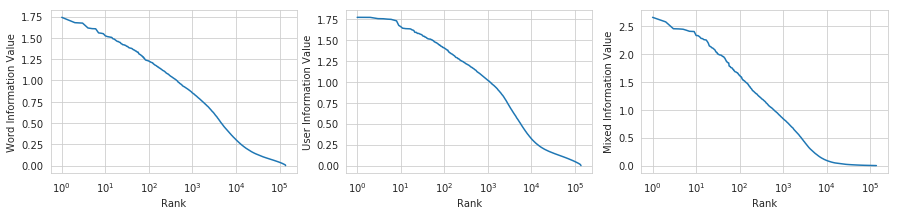

In [10]:
plt.rcParams["figure.figsize"] = (15, 3)
fig, axes = plt.subplots(1, 3)

def decay_plot(df, base, ax=None, label=None, threshold=1e7):
    
    rank = "rank_" + base
    ival = "ival_" + base
    reduced_df = df[df[rank] < threshold].copy()
    reduced_df.sort_values(rank, ascending=True, inplace=True)
    reduced_df.plot(x=rank, y=ival, logx=True, ax=ax, legend=False)
    
    ax.set_xlabel("Rank")
    ax.set_ylabel(label)
    
decay_plot(df, "palabras", ax=axes[0], label="Word Information Value")
decay_plot(df, "personas", ax=axes[1], label="User Information Value")
decay_plot(df, "palper", ax=axes[2], label="Mixed Information Value")

In [11]:
fig.savefig("../output/figures/information_value_decay.png", bbox_inches='tight')